In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('../data/flights.csv')

# Display the first few rows
df.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [2]:
# Identify null values
null_values = df.isnull().sum()
null_values


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
# replace null values with 0
null_values.fillna(0, inplace=True)

In [4]:
# show departures that were delayed by more than 15 minutes
df[df['DepDel15'].isnull()]['DepDelay']

#update DelDel15 to 0 if null
df['DepDel15'].fillna(0, inplace=True)

In [5]:
# normalize the data by removing outliers from depdelay and arrdelay

# Calculate the z-scores of depdelay and arrdelay
z_scores = (df[['DepDelay', 'ArrDelay']] - df[['DepDelay', 'ArrDelay']].mean()) / df[['DepDelay', 'ArrDelay']].std()

# Calculate the absolute z-scores
abs_z_scores = z_scores.abs()

# Get the rows with outliers
outliers = (abs_z_scores > 3).any(axis=1)

# Remove the outliers
df = df[~outliers]


In [6]:
# show newly cleaned data
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0


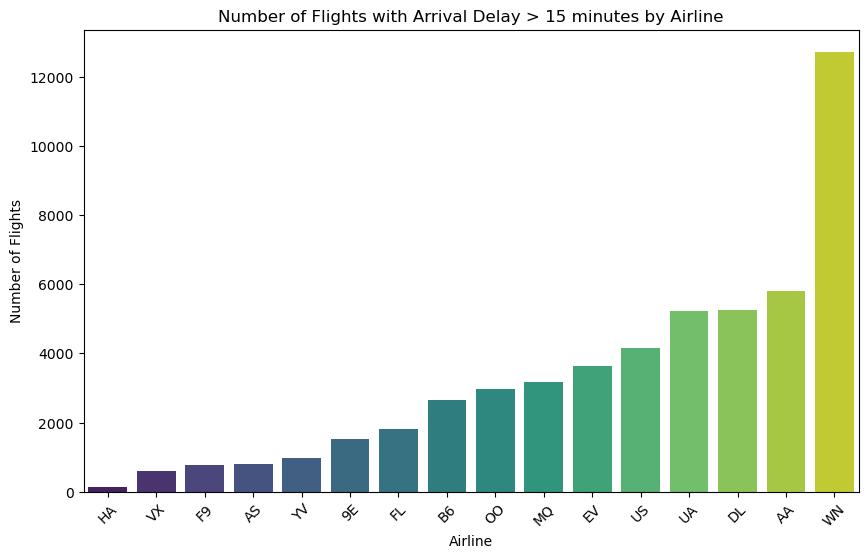

In [7]:
# Create a bar chart showing arrival delay that was greater than 15 minutes by airline
import matplotlib.pyplot as plt
import seaborn as sns
# Group by airline and calculate the number of delayed flights
delayed_flights = df[df['ArrDel15'] == 1].groupby('Carrier').size()

# Sort the number of delayed flights in ascending order
delayed_flights = delayed_flights.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=delayed_flights.index, y=delayed_flights.values, palette='viridis')
plt.title('Number of Flights with Arrival Delay > 15 minutes by Airline')
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# which route has the most late arrivals from origin airport to destination airport?

# Group by origin and destination cities and calculate the number of delayed flights
delayed_flights_route = df[df['ArrDel15'] == 1].groupby(['OriginCity', 'DestCity']).size()

# Sort the number of delayed flights in ascending order
delayed_flights_route = delayed_flights_route.sort_values(ascending=True)

# Display the top 10 routes with the most delayed flights
delayed_flights_route.tail(10)

In [8]:
# Check the distribution of the target column to see how many flights are delayed (1) and not delayed (0)
print(df['ArrDel15'].value_counts())

ArrDel15
0    213220
1     52153
Name: count, dtype: int64


In [10]:
# Create a model to predict the likelihood of a flight being delayed based on the day of the week and the arrival airport
# use a logistic regression model
# split the date into training and testing sets
# train the model
# calculate the accuracy of the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the features and target variable
X = df[['DayOfWeek', 'DestAirportID']]
y = df['ArrDel15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy



0.8032406971267075

In [12]:
# show the odds of a flight being delayed to Chicago on a Monday
# get the airport ID for Chicago
chicago_airport_id = df[df['DestCity'] == 'Chicago']['DestAirportID'].iloc[0]

# Calculate the odds of a flight being delayed to Chicago on a Monday   
odds_delayed_chicago_monday = model.predict_proba([[1, chicago_airport_id]])[0, 1] / (1 - model.predict_proba([[1, chicago_airport_id]])[0, 1])
odds_delayed_chicago_monday

0.23443766989061088

In [13]:
# Make a prediction of the odds of a flight being delayed to Los Angeles on a Wednesday
# get the airport ID for Los Angeles

los_angeles_airport_id = df[df['DestCity'] == 'Los Angeles']['DestAirportID'].iloc[0]

# Calculate the odds of a flight being delayed to Los Angeles on a Wednesday
odds_delayed_los_angeles_wednesday = model.predict_proba([[3, los_angeles_airport_id]])[0, 1] / (1 - model.predict_proba([[3, los_angeles_airport_id]])[0, 1])
odds_delayed_los_angeles_wednesday

0.24334066327714846

In [14]:
# Get unique column values for origin airport and id and export to CSV
unique_origin_airports = df[['OriginAirportName', 'OriginAirportID']].drop_duplicates()
unique_origin_airports.to_csv('unique_origin_airports.csv', index=False)

In [24]:
# export the model to import later into Flask
import pickle

pickle.dump(model, open('server/model.pkl', 'wb'))